# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.
* Observations are placed before each scatter plot

In [1]:
import requests
import json
import api_keys
import random
import time
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import datetime

# create variables for plot label and filename dates
datetoday = datetime.datetime.now().strftime('%d/%m/%y')
datefilename = datetime.datetime.now().strftime('%Y-%m-%d')

# install citypy to utilise below 
from citipy import citipy

## Generate Cities List

In [2]:
#generate cities
# declare counter and max count
ctr = 0
max_ct = 650
city_list = []

while ctr < max_ct:
    # randomise longitude and latitude
    latitude = round(random.uniform(-90.00,90.00),2) 
    longitude = round(random.uniform(-180.00,180.00),2)
    # get city details
    city = citipy.nearest_city(latitude,longitude)

    # prevent duplicate cities in the main list
    if city.city_name not in city_list:
        ctr += 1
        city_list.append(city.city_name)

len(city_list)

650

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# initialise set and record number
set_no = 1
record = 0

# initialise URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_keys.weather_api_key}&units=imperial&q="

# maximum number of records requested excluding missing cities
maxData = 500
 # number of record per minute
recsPerMin=50
# successful request counter
recs_fetched = 0
# proc counter
prc_cntr = 0

# initialise city data directory
city_data = {"City":[],
             "Lat":[],
             "Lng":[],
             "Max Temp":[],
             "Humidity":[],
             "Cloudiness":[],
             "Wind Speed":[],
             "Country":[],
             "Date":[]}

print("Beginning Data Retrieval \n--------------------------------------------------------------")
    
for cty_name in city_list:
    # increment for each call even if city does not exist
    response = requests.get(f"{url}{cty_name}").json()

    # maximum of 60 calls per minute, pause for 1 min after 50 calls
    # separate call counter from record counter to prevent exceeding in case missing city > 10
    if prc_cntr == recsPerMin:
        time.sleep(60)
        prc_cntr = 0
        
    if record == 50:
        #reset record number indicator and increment set number
        record = 0
        set_no += 1

    # if city exists online, process and increment counter
    # using if/else instead of try/catch since try catch will mess up with the counters
    if response['cod'] != '404':
        recs_fetched += 1
        record += 1
        print(f"Processing Record {record} of Set {set_no} | {cty_name}")
        
        # load data to lists
        city_data["City"].append(response["name"])
        city_data["Lat"].append(response["coord"]["lat"])
        city_data["Lng"].append(response["coord"]["lon"])
        city_data["Max Temp"].append(response["main"]["temp_max"])
        city_data["Humidity"].append(response["main"]["humidity"])
        city_data["Cloudiness"].append(response["clouds"]["all"])
        city_data["Wind Speed"].append(response["wind"]["speed"])
        city_data["Country"].append(response["sys"]["country"])
        city_data["Date"].append(response["dt"])
    else:
        # have noticed that the variable values do not reflect if the exception is fired
        # this is to ensure that only 50 records are processed per minute regardless
        # if the record exists or not
        prc_cntr += 1 
        print(f"City not found. Skipping...")
        
    prc_cntr += 1
    
    # if max data is reached, break the loop
    if recs_fetched >= maxData:
        break

print (f"-------------------------------------------------------------- \
       \nData Retrieval Complete - {recs_fetched} records fetched \
       \n--------------------------------------------------------------")

Beginning Data Retrieval 
--------------------------------------------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | ploemeur
Processing Record 3 of Set 1 | rocha
Processing Record 4 of Set 1 | galle
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | mount isa
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | touros
Processing Record 10 of Set 1 | butaritari
City not found. Skipping...
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | den helder
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | rikitea
City not found. Skipping...
Processing Record 17 of Set 1 | mongu
Processing Record 18 of Set 1 | ostrovnoy
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | pevek
Processing Record 21 of Set 1 | dikson
Pr

City not found. Skipping...
Processing Record 37 of Set 4 | jinxiang
Processing Record 38 of Set 4 | havre-saint-pierre
Processing Record 39 of Set 4 | kasongo-lunda
City not found. Skipping...
Processing Record 40 of Set 4 | leningradskiy
Processing Record 41 of Set 4 | amga
Processing Record 42 of Set 4 | vila velha
Processing Record 43 of Set 4 | neiafu
City not found. Skipping...
Processing Record 44 of Set 4 | yichun
Processing Record 45 of Set 4 | iqaluit
Processing Record 46 of Set 4 | mehamn
Processing Record 47 of Set 4 | morlaix
Processing Record 48 of Set 4 | deputatskiy
Processing Record 49 of Set 4 | port elizabeth
Processing Record 50 of Set 4 | madimba
Processing Record 1 of Set 5 | port hedland
Processing Record 2 of Set 5 | nan
Processing Record 3 of Set 5 | port hardy
Processing Record 4 of Set 5 | hamilton
City not found. Skipping...
Processing Record 5 of Set 5 | kloulklubed
Processing Record 6 of Set 5 | maraba
Processing Record 7 of Set 5 | tahta
Processing Record

Processing Record 23 of Set 8 | straumen
Processing Record 24 of Set 8 | kapit
Processing Record 25 of Set 8 | xichang
Processing Record 26 of Set 8 | fort nelson
Processing Record 27 of Set 8 | moyale
Processing Record 28 of Set 8 | quatre cocos
Processing Record 29 of Set 8 | ancud
Processing Record 30 of Set 8 | port keats
Processing Record 31 of Set 8 | brownwood
Processing Record 32 of Set 8 | karratha
Processing Record 33 of Set 8 | rawson
Processing Record 34 of Set 8 | opuwo
Processing Record 35 of Set 8 | west plains
Processing Record 36 of Set 8 | gouyave
Processing Record 37 of Set 8 | yenagoa
Processing Record 38 of Set 8 | utinga
Processing Record 39 of Set 8 | celendin
Processing Record 40 of Set 8 | bage
Processing Record 41 of Set 8 | cabo san lucas
Processing Record 42 of Set 8 | naze
Processing Record 43 of Set 8 | holland
Processing Record 44 of Set 8 | baghdad
Processing Record 45 of Set 8 | sosnovo-ozerskoye
Processing Record 46 of Set 8 | axim
Processing Record 47

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(city_data)
weather_df.to_csv("../output_data/cities.csv", index=False, header=True)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,1.40,85,90,13.80,CA,1610376478
1,Ploemeur,47.7333,-3.4333,48.99,76,90,5.75,FR,1610376479
2,Rocha,-34.4833,-54.3333,85.77,52,100,6.82,UY,1610376479
3,Galle,6.0367,80.2170,77.67,86,99,5.68,LK,1610376449
4,Bredasdorp,-34.5322,20.0403,75.20,60,97,18.41,ZA,1610376479


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,5.000000e+02
mean,18.382994,16.346061,51.481780,72.7980,53.634000,8.583040,1.610377e+09
std,33.453193,92.327952,32.767386,20.8224,38.909226,5.938696,2.619261e+02
min,-54.800000,-175.200000,-46.070000,5.0000,0.000000,0.430000,1.610376e+09
25%,-7.998750,-65.553575,28.842500,63.0000,9.000000,4.265000,1.610377e+09
50%,20.601100,19.182950,62.600000,78.0000,69.000000,6.965000,1.610377e+09
75%,47.453225,99.439975,78.800000,87.0000,90.000000,11.500000,1.610377e+09
max,78.218600,178.416700,96.820000,100.0000,100.000000,29.930000,1.610377e+09


In [6]:
#  Get the indices of cities that have humidity over 100%.
# [RS] - I'd prefer to automate the checks :)
weather_df_outliers = []
if weather_df['Humidity'].max() > 100:
    weather_df_outliers = weather_df.loc[weather_df['Humidity'] > 90].index

weather_df_outliers

[]

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df[~weather_df.index.isin(weather_df_outliers)]
len(clean_city_data)

500

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

#### OBSERVATIONS:
* Considering the data to be concentrated more on Northern Latitude there is a close correlation to drop in temperature as the city moves away from the equator. 
* Given the results of the sample, if I am to enhance this analysis I'd rather get the positive and negaive latitude values for a single longitude and ensure that both the positive and negative latitude cities have weather data, then I'll do the analysis and plotting from there.

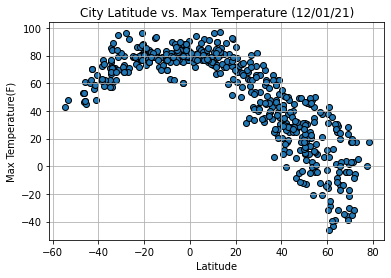

In [26]:
# Bonus - create a function for the scatter plots
def create_plot(x_values,y_values,title,x_label,y_label,filename,islinear):
    # create scatter plot
    if not islinear:
        # create scatter plot with specific formatting
        plt.scatter(x_values,y_values,edgecolors="black")
        plt.title(f'{title} ({datetoday})')
        # add grid
        plt.grid()
    else:
        # create scatter plot
        plt.scatter(x_values,y_values)
        # calculate line variables
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
        # calculate regress values
        regress_values = x_values * slope + intercept
        # add line and equation
        plt.plot(x_values,regress_values,"r-")
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.annotate(line_eq,(min(x_values),min(y_values)+5),fontsize=15,color="red")
        print(f"The r-value is {rvalue}")

    # add labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # save figure
    if not islinear:
        plt.savefig(f"../output_data/{filename} {datefilename}.png")
    # print visualisation
    plt.show()

# function call for City Latitude vs. Max Temperature
create_plot(clean_city_data['Lat'],
            clean_city_data['Max Temp'],
            'City Latitude vs. Max Temperature',
            'Latitude',
            'Max Temperature(F)',
            'City Latitude vs. Max Temperature',
            False)

## Latitude vs. Humidity Plot

#### OBSERVATIONS:
* For this data there seems to be a concentration of high humidity on the northern latitude although there is not much of a correlation with the acquired dataset. It would be interesting to see an equal amount of citis in the >-40 latitude perhaps it could show more corellation. 

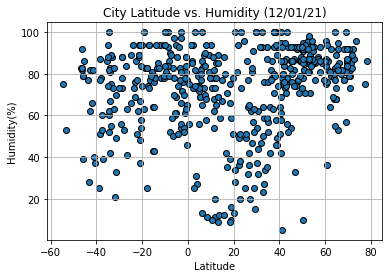

In [27]:
# function call for City Latitude vs. Humidity
create_plot(clean_city_data['Lat'],
            clean_city_data['Humidity'],
            'City Latitude vs. Humidity',
            'Latitude',
            'Humidity(%)',
            'City Latitude vs. Humidity',
            False)

## Latitude vs. Cloudiness Plot

#### OBSERVATIONS:
* There seems to be a concentration between 70% to 100% cloudiness but not much correlation, would be interesting to compare data from different days or seasons.

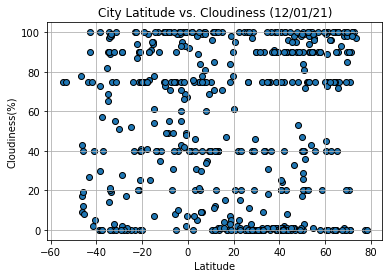

In [28]:
# function call for City Latitude vs. Cloudiness
create_plot(clean_city_data['Lat'],
            clean_city_data['Cloudiness'],
            'City Latitude vs. Cloudiness',
            'Latitude',
            'Cloudiness(%)',
            'City Latitude vs. Cloudiness',
            False)

## Latitude vs. Wind Speed Plot

#### OBSERVATIONS:
* Again onsidering the data to be concentrated more on Northern Latitude the correlation seepms to be consistent between wind speed and latitude with a high concentration between 0 and 10. One interesting observation in this data is all of the chosen cities seem to have a fair to moderately windy weather and no storms.

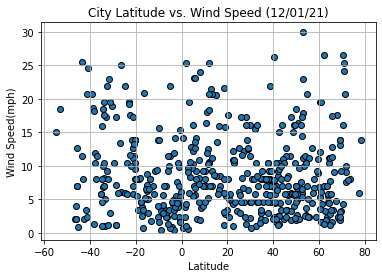

In [29]:
# function call for City Latitude vs. Wind Speed
create_plot(clean_city_data['Lat'],
            clean_city_data['Wind Speed'],
            'City Latitude vs. Wind Speed',
            'Latitude',
            'Wind Speed(mph)',
            'City Latitude vs. Wind Speed',
            False)

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a strong negative correlation between northern hemishpere latitude and maximum temperature - maximum temperature drops as the city moves up further from the equator. 

The r-value is -0.8673060190097139


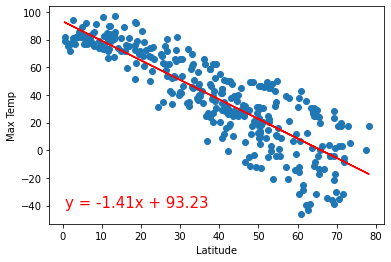

In [31]:
# function call for City Latitude Northern Hemisphere vs. Temperature
create_plot(clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] >= 0]['Max Temp'],
            '',
            'Latitude',
            'Max Temp',
            '',
            True)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a positive correlation between southern hemishpere latitude and maximum temperature - maximum temperature drops as the city moves closer to the equator.

The r-value is 0.6308683846767267


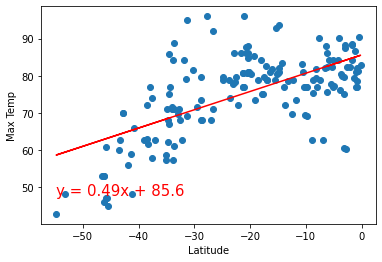

In [32]:
# function call for City Latitude Southern Hemisphere vs. Temperature
create_plot(clean_city_data.loc[clean_city_data['Lat'] < 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] < 0]['Max Temp'],
            '',
            'Latitude',
            'Max Temp',
            '',
            True)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a weak positive correlation between northern latitude and humidity although on a visual inspection it virtually is more of a zero corellation with concentration of high humidity on cities further north. 

The r-value is 0.3419891592827703


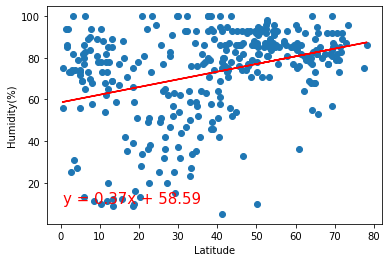

In [33]:
# function call for City Latitude Northern Hemisphere vs. Humidity
create_plot(clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] >= 0]['Humidity'],
            '',
            'Latitude',
            'Humidity(%)',
            '',
            True)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a weak positive correlation from southern hemisphere latitude vs humidity.

The r-value is 0.16816722130328782


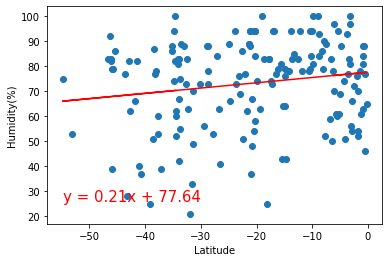

In [35]:
# function call for City Latitude Southern Hemisphere vs. Humidity
create_plot(clean_city_data.loc[clean_city_data['Lat'] < 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] < 0]['Humidity'],
            '',
            'Latitude',
            'Humidity(%)',
            '',
            True)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a moderate positive correlation between cloudiness and latitude in the northern hemisphere but there is a heavy distribution on 100% and 0% values. 

The r-value is 0.1518068421401787


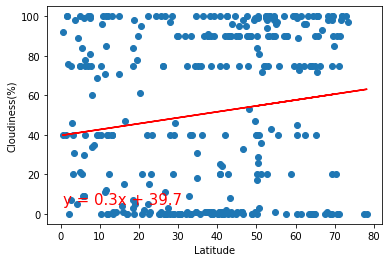

In [36]:
# function call for City Latitude Northern Hemisphere vs. Cloudiness
create_plot(clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] >= 0]['Cloudiness'],
            '',
            'Latitude',
            'Cloudiness(%)',
            '',
            True)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a moderate positive correlation between cloudiness and latitude in the southern hemisphere. 

The r-value is 0.23214525223490337


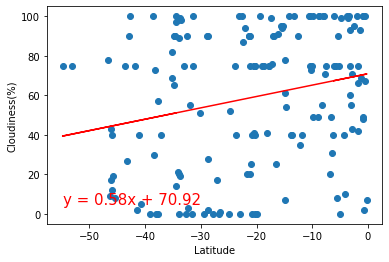

In [37]:
# function call for City Latitude Southern Hemisphere vs. Cloudiness
create_plot(clean_city_data.loc[clean_city_data['Lat'] < 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] < 0]['Cloudiness'],
            '',
            'Latitude',
            'Cloudiness(%)',
            '',
            True)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is almost no correlation between wind speed and latitude in the northern hemisphere. 

The r-value is -0.07806772099635034


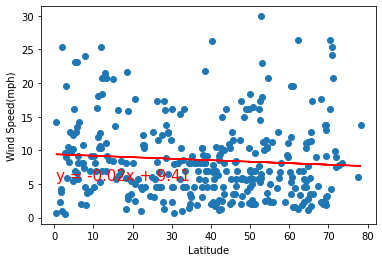

In [38]:
# function call for City Latitude Northern Hemisphere vs. Wind Speed
create_plot(clean_city_data.loc[clean_city_data['Lat'] >= 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] >= 0]['Wind Speed'],
            '',
            'Latitude',
            'Wind Speed(mph)',
            '',
            True)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#### OBSERVATIONS:
* There is a shallow negative correlation between wind speed and latitude in the southern hemisphere. 

The r-value is -0.28924289483460963


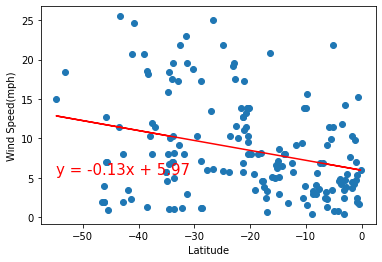

In [39]:
# function call for City Latitude Southern Hemisphere vs. Wind Speed
create_plot(clean_city_data.loc[clean_city_data['Lat'] < 0]['Lat'],
            clean_city_data.loc[clean_city_data['Lat'] < 0]['Wind Speed'],
            '',
            'Latitude',
            'Wind Speed(mph)',
            '',
            True)